In [211]:
%load_ext autoreload
%autoreload 2

import pickle
import chess
import numpy as np
from cam_chess import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


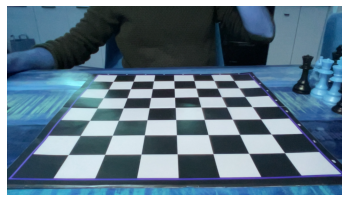

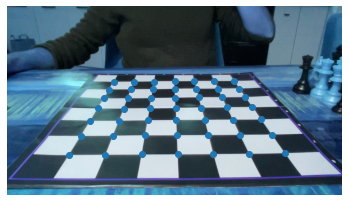

In [186]:
empty = capture()
corners = detect_checkerboard(empty)

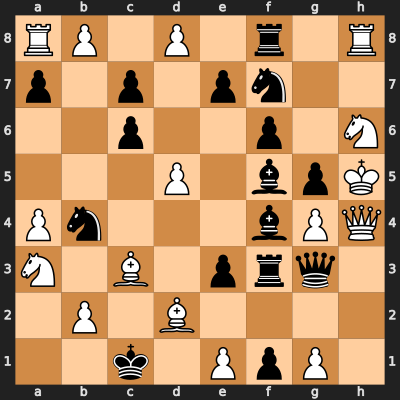

In [182]:
board = random_board()
# board = chess.Board()
# board = chess.Board(fen='rnbqkbnr/8/pppppppp/8/8/PPPPPPPP/8/RNBQKBNR')
# board = chess.Board(fen='rnbqkbnr/8/8/pppppppp/PPPPPPPP/8/8/RNBQKBNR')
# board = chess.Board(fen='RNBKQBNR/PPPPPPPP/8/8/8/8/pppppppp/rnbkqbnr')
# board = chess.Board(fen='RNBKQBNR/8/PPPPPPPP/8/8/pppppppp/8/rnbkqbnr')
# board = chess.Board(fen='RNBKQBNR/8/8/PPPPPPPP/pppppppp/8/8/rnbkqbnr')

board

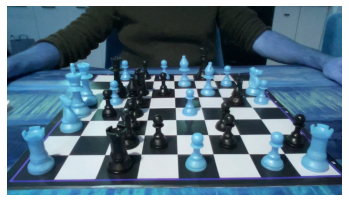

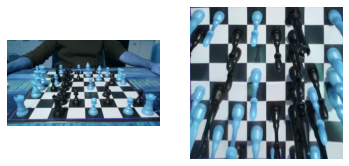

In [183]:
save_train_data(capture_pipeline(corners), is_filled(board))

# Test game

In [187]:
captures = []

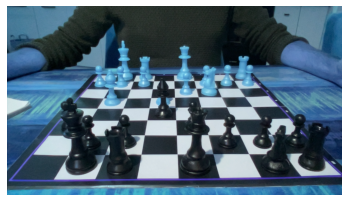

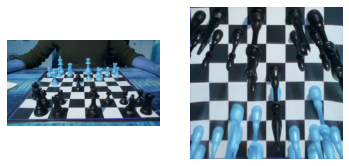

In [207]:
captures.append(capture_pipeline(corners))

In [231]:
game = ['e4', 'e5', 'Nf3', 'd6', 'd3', 'Nf6', 'Be2', 'Be7', '0-0', '0-0',
        'Bg5', 'h6', 'Bf6', 'Bf6', 'Nc3', 'Bg4', 'Ne5', 'Be5', 'Bg4']

pickle.dump({'captures': captures,
             'game': game},
            open('simple_test_game.pkl', 'wb'))

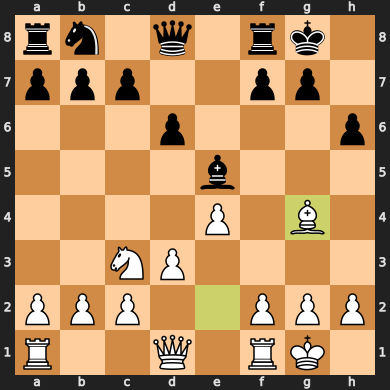

In [230]:
board = chess.Board()

for move in game:
    board.push_san(move)
board

# Idea 1. Random board

In [105]:
def random_board():
    rand = np.random.choice([p for p in 'rnbqkbnrppppppppPPPPPPPPRNBQKBNR' + '_' * 32], 64, replace=False).reshape(8, 8)
    rand = '/'.join([''.join(row) for row in rand])

    final = ''
    count = 0
    for r in rand:
        if r == '_':
            count += 1
        else:
            final += str(count) + r if count else r
            count = 0
    if r == '_':
        final += str(count)

    return chess.BaseBoard(final)

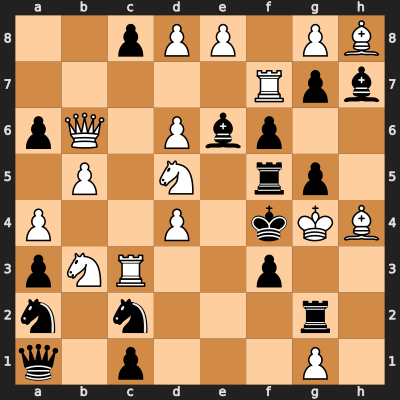

In [106]:
random_board()

Hmz... It will take quite some time to set up pieces into their places even if we only consider their colors. Still this would create most representative dataset.

# Idea 2. Having preset positions

We already did that in the first iteration. It is relatively efficient, but you have to come up with preset positions first, thus creating some unnecessary code. Also it is not really comfortable to execute the setups and might lead into less representative training set than random positions.

# Idea 3. Active learning

Let's suppose that we have quick model training loop at the starting position and wait for the first move. Then based on user feedback we could retrain. This allows to start playing right away, but will be quite slow to train. 

# Idea 4. Excaustive preset positions

We need to teach all possible occlusions at different corners, thus it might be enough to figure out some pattern that produces richest dataset. For example: excausting all pairs at different board locations.

Having 6 piece types and two colors we can construct 132 occlusions. Putting that to 9 or so board locations would result in 1k occlusion examples and 2k images. This will be much faster to execute and later could be combined with active learning approches.

Let's try this.